# Лабораторная работа №2. 
## Дискретное преобразование Фурье
                                                                                                    
Выполнил студент ИВТ-31: Петров Дмитрий

### Основное задание
#### 1. Представить в виде ряда Фурье периодическую функцию

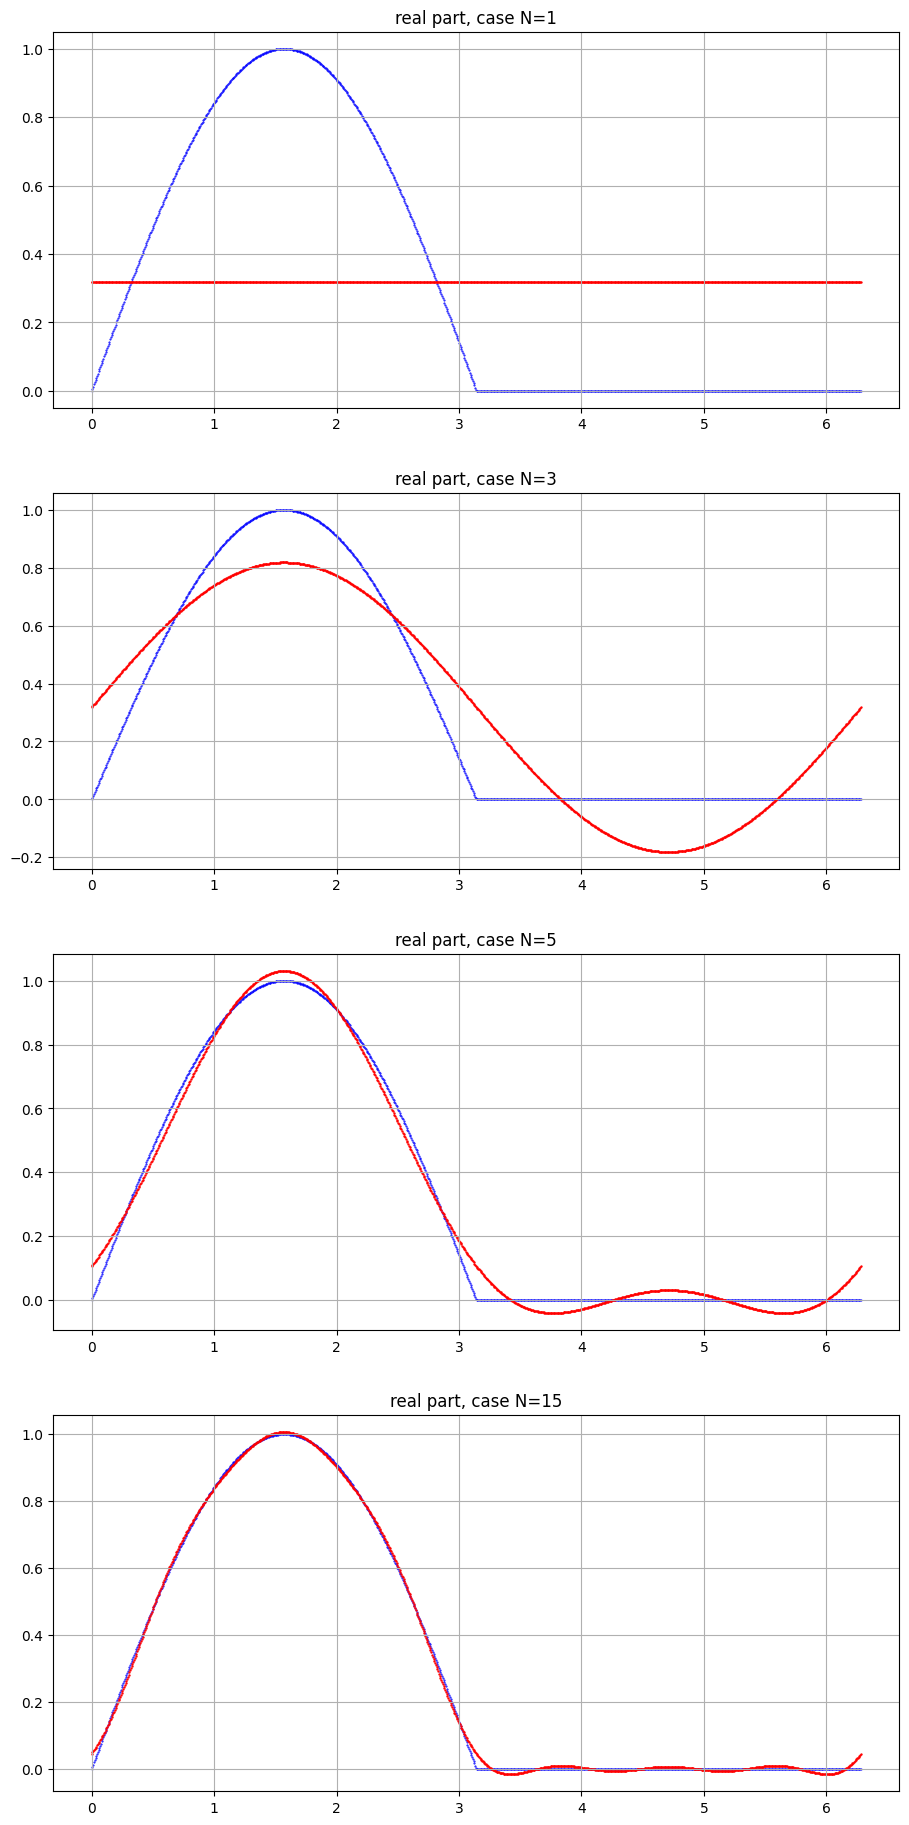

In [378]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from scipy import fftpack

T = 2 * np.pi
x1 = 0
x2 = 2 * np.pi
Nx = 1000

f = lambda x: np.where((np.fmod(x, T) >= -np.pi) & (np.fmod(x, T) <= 0), 0,
                np.where((np.fmod(x, T) > 0) & (np.fmod(x, T) <= np.pi), np.sin(x), 0))

x_range = np.linspace(x1, x2, Nx)

y_true = f(x_range)
y_true_real = [y.real for y in y_true]
y_true_imag = [y.imag for y in y_true]

def integral_complex(func, a, b, **kwargs):
    def real_func(x):
        return np.real(func(x))
    def imag_func(x):
        return np.imag(func(x))
    real_integral = spi.quad(real_func, a, b, **kwargs)
    imag_integral = spi.quad(imag_func, a, b, **kwargs)
    integral = (real_integral[0] + 1j*imag_integral[0], real_integral[1:], imag_integral[1:])
    return integral

def fourier_coeffs(func, N):
    result = []
    N1 = -int(N/2)
    N2 = int((N-1)/2)
    for k in range(N1, N2+1):
        ck = (1./T) * integral_complex(lambda x: func(x) * np.exp(-1j * 2 * np.pi * k * x / T), -T/2, T/2)[0]
        result.append(ck)
    return np.array(result)

def fourier_fit(x, c):
    result = 0. + 0.j
    N = len(c)
    N1 = -int(N/2)
    N2 = int((N-1)/2)
    for k in range(N1, N2+1):
        result += c[k+int(N/2)] * np.exp(1j * 2. * np.pi * k * x / T)
    return result

N_all = [1, 3, 5, 15]

fig, axs = plt.subplots(len(N_all), 1, figsize=(10, 20))
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=4.0)
row = 0
for N in N_all:
    C = fourier_coeffs(f, N)
    y_approx = fourier_fit(x_range, C)
    y_approx_real = [y.real for y in y_approx]
    axs[row].set_title('real part, case N=' + str(N))
    axs[row].grid(True)
    axs[row].scatter(x_range, y_true_real, color='blue', s=1, marker='.')
    axs[row].scatter(x_range, y_approx_real, color='red', s=2, marker='.')
    row += 1
plt.show()
 

c:\Users\Dmitry\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Dmitry\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


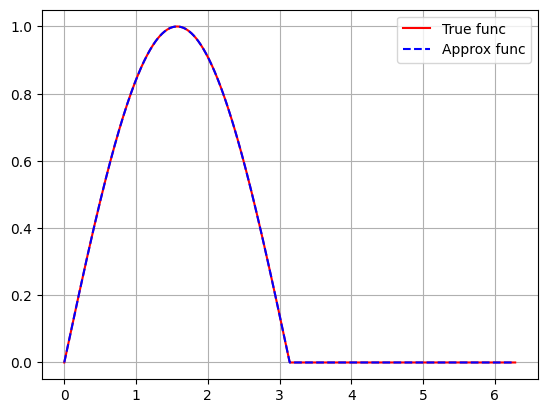

In [379]:
x_period = np.arange(0, T, T/Nx)
fx = f(x_period)
f_real = f(x_range)

X = fftpack.fft(fx) / Nx
X = np.roll(X, int(Nx/2))
y_approx = fourier_fit(x_period, X)
plt.grid()
plt.plot(x_range, f_real, "r")
plt.plot(x_period, y_approx, "b--")
plt.legend(["True func", "Approx func"])
plt.show()


#### 2. Амплитудный и фазовый спектры действиетльного гармонического сигнала

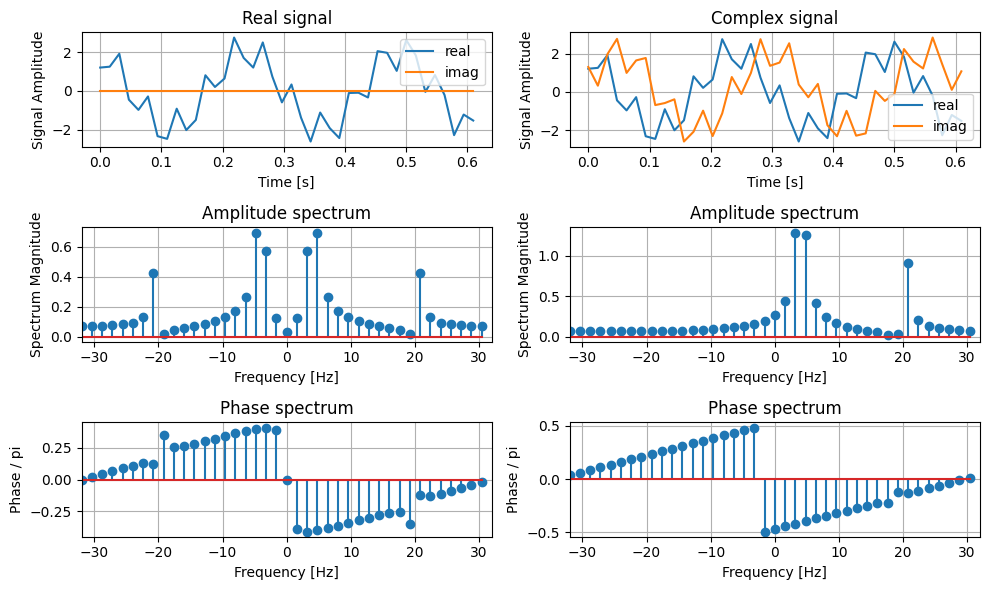

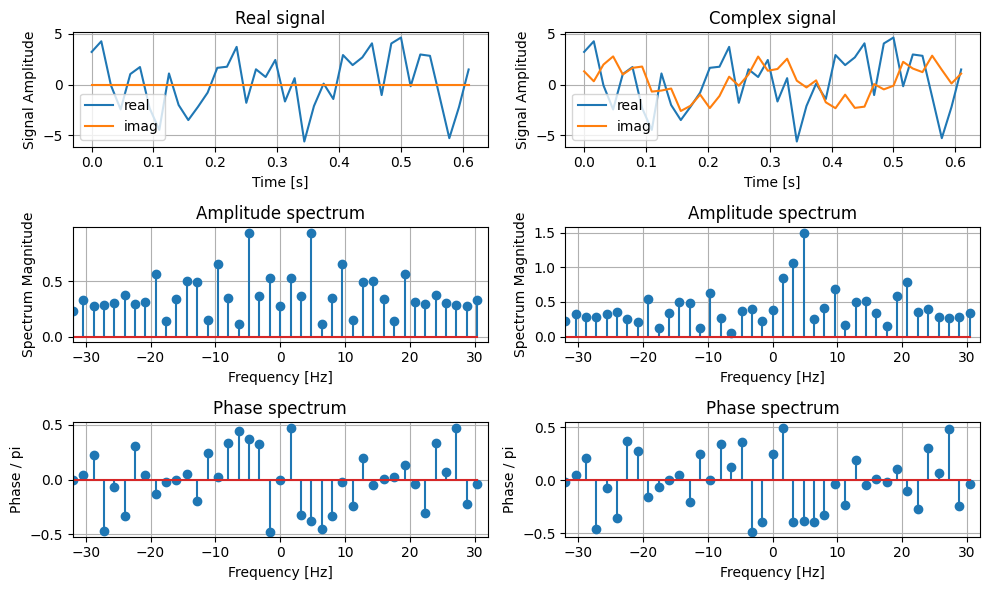

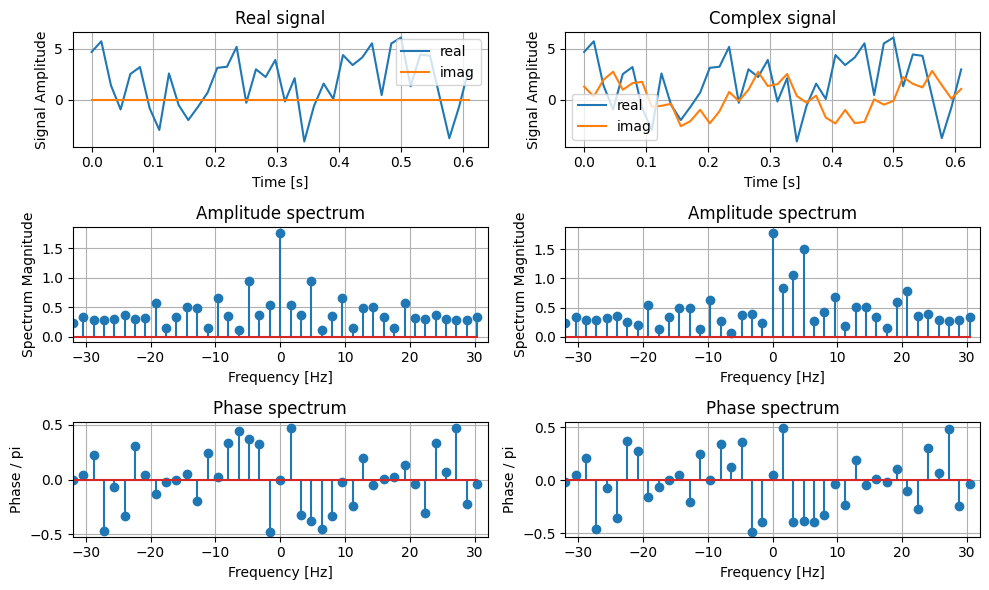

In [380]:
N = 40           # Размер ДПФ (количество гармоник)
Num = 21 #номер по списку
R = 4 #номер компьютера
Amp1 = Num % 4
Amp2 = (Num + 1) % 4
f1 = Num
f2 = R
phi1 = 3*np.pi/4
phi2 = 2*np.pi/Num
fs = 64
T = 1/fs
Ans = 2 + Amp1
K = 0.25 * (1 + Num % 8)

# Оси времени и частоты
t = np.linspace(0, N*T, N, endpoint = False)
f = fftpack.fftfreq(N) * fs

# Генерация действительного и комплексного гармонического сигнала для первой амплитуды
x1 = Amp1 * np.cos(2 * np.pi * f1 * t + phi1)
x2 = Amp1 * np.exp(1j * (2 * np.pi * f1 * t + phi1))

# Генерация действительного и комплексного гармонического сигнала для второй амплитуды
x11 = Amp2 * np.cos(2 * np.pi * f2 * t + phi2)
x22 = Amp2 * np.exp(1j * (2 * np.pi * f2 * t + phi2))

#Сумма двух сигналов
xsum_re = x1 + x11
xsum_im = x2 + x22

# Дискретное преобразование Фурье
dff_re = fftpack.fft(xsum_re) / N
dff_im = fftpack.fft(xsum_im) / N

# Амплитудный и фазовый частотный спектры 
A1 = np.abs(dff_re)
A2 = np.abs(dff_im)
P1 = np.arctan(np.imag(dff_re) / (np.real(dff_re)+1e-6))
P2 = np.arctan(np.imag(dff_im) / (np.real(dff_im)+1e-6))

# Отображение группами (subplot)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 6))
for i in range(0,2):
    if i == 0:
        x = xsum_re
        A = A1
        P = P1
        Title = 'Real signal'
    else:
        x = xsum_im
        A = A2
        P = P2
        Title = 'Complex signal'
    axes[0,i].plot(t, np.real(x), label='real')
    axes[0,i].plot(t, np.imag(x), label='imag')
    axes[0,i].grid(True)
    axes[0,i].set_xlabel('Time [s]')
    axes[0,i].set_ylabel('Signal Amplitude')
    axes[0,i].legend()
    axes[0,i].title.set_text(Title)
    axes[1,i].stem(f, A)
    axes[1,i].grid(True)
    axes[1,i].set_xlabel('Frequency [Hz]')
    axes[1,i].set_ylabel('Spectrum Magnitude')
    axes[1,i].set_xlim(-fs/2, fs/2)
    axes[1,i].title.set_text('Amplitude spectrum')
    axes[2,i].stem(f, P / np.pi)
    axes[2,i].grid(True)
    axes[2,i].set_xlabel('Frequency [Hz]')
    axes[2,i].set_ylabel('Phase / pi')
    axes[2,i].set_xlim(-fs/2, fs/2)
    axes[2,i].title.set_text('Phase spectrum')
fig.tight_layout()
plt.show()

rng = np.random.default_rng(10)
noise = np.array(rng.integers(low=-Ans, high=Ans, size=N, endpoint=True))

Asum_ns_re = xsum_re + noise
Asum_ns_im = xsum_im + noise

# Дискретное преобразование Фурье
dff_re_ns = fftpack.fft(Asum_ns_re) / N
dff_im_ns= fftpack.fft(Asum_ns_im) / N

# Амплитудный и фазовый частотный спектры 
A1 = np.abs(dff_re_ns)
A2 = np.abs(dff_im_ns)
P1 = np.arctan(np.imag(dff_re_ns) / (np.real(dff_re_ns)+1e-6))
P2 = np.arctan(np.imag(dff_im_ns) / (np.real(dff_im_ns)+1e-6))

# Отображение группами (subplot)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 6))
for i in range(0,2):
    if i == 0:
        x = Asum_ns_re
        A = A1
        P = P1
        Title = 'Real signal'
    else:
        x = Asum_ns_im
        A = A2
        P = P2
        Title = 'Complex signal'
    axes[0,i].plot(t, np.real(x), label='real')
    axes[0,i].plot(t, np.imag(x), label='imag')
    axes[0,i].grid(True)
    axes[0,i].set_xlabel('Time [s]')
    axes[0,i].set_ylabel('Signal Amplitude')
    axes[0,i].legend()
    axes[0,i].title.set_text(Title)
    axes[1,i].stem(f, A)
    axes[1,i].grid(True)
    axes[1,i].set_xlabel('Frequency [Hz]')
    axes[1,i].set_ylabel('Spectrum Magnitude')
    axes[1,i].set_xlim(-fs/2, fs/2)
    axes[1,i].title.set_text('Amplitude spectrum')
    axes[2,i].stem(f, P / np.pi)
    axes[2,i].grid(True)
    axes[2,i].set_xlabel('Frequency [Hz]')
    axes[2,i].set_ylabel('Phase / pi')
    axes[2,i].set_xlim(-fs/2, fs/2)
    axes[2,i].title.set_text('Phase spectrum')
fig.tight_layout()
plt.show()

# Добавляем к шуму константу 

rng = np.random.default_rng(10)
noise = np.array(rng.integers(low=-Ans, high=Ans, size=N, endpoint=True))

A_sumk_re = Asum_ns_re + K*Amp1
A_sumk_im = Asum_ns_im + K*Amp1

# Дискретное преобразование Фурье
dffk_re_ns = fftpack.fft(A_sumk_re) / N
dffk_im_ns= fftpack.fft(A_sumk_im) / N

# Амплитудный и фазовый частотный спектры 
A1 = np.abs(dffk_re_ns)
A2 = np.abs(dffk_im_ns)
P1 = np.arctan(np.imag(dff_re_ns) / (np.real(dffk_re_ns)+1e-6))
P2 = np.arctan(np.imag(dff_im_ns) / (np.real(dffk_im_ns)+1e-6))

# Отображение группами (subplot)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 6))
for i in range(0,2):
    if i == 0:
        x = A_sumk_re
        A = A1
        P = P1
        Title = 'Real signal'
    else:
        x = A_sumk_im
        A = A2
        P = P2
        Title = 'Complex signal'
    axes[0,i].plot(t, np.real(x), label='real')
    axes[0,i].plot(t, np.imag(x), label='imag')
    axes[0,i].grid(True)
    axes[0,i].set_xlabel('Time [s]')
    axes[0,i].set_ylabel('Signal Amplitude')
    axes[0,i].legend()
    axes[0,i].title.set_text(Title)
    axes[1,i].stem(f, A)
    axes[1,i].grid(True)
    axes[1,i].set_xlabel('Frequency [Hz]')
    axes[1,i].set_ylabel('Spectrum Magnitude')
    axes[1,i].set_xlim(-fs/2, fs/2)
    axes[1,i].title.set_text('Amplitude spectrum')
    axes[2,i].stem(f, P / np.pi)
    axes[2,i].grid(True)
    axes[2,i].set_xlabel('Frequency [Hz]')
    axes[2,i].set_ylabel('Phase / pi')
    axes[2,i].set_xlim(-fs/2, fs/2)
    axes[2,i].title.set_text('Phase spectrum')
fig.tight_layout()
plt.show()

#### 2.3 Исследование ДПФ комплексной "вырезки" гармонического сигнала

#### 3. Дополнительное задание
##### Проверить свойство задержки для ДПФ

In [381]:
N = 10     
Num = 21
Amp1 = Num % 4
f1 = Num
phi1 = 3*np.pi/4
fs = 64
T = 1/fs
k = 2

t = np.linspace(0, N*T, N, endpoint = False)
t_delay = np.zeros(N)
t_delay[0:k] = t[N - k : N]
t_delay[k:N] = t[0: N - k]

x = Amp1 * np.exp(1j * (2 * np.pi * f1 * t + phi1))
x_delay = Amp1 * np.exp(1j * (2 * np.pi * f1 * t_delay + phi1))


X = fftpack.fft(x) / N
X_delay = fftpack.fft(x_delay) / N

i = np.array([i for i in range(0, N)])

X_temp = X * np.exp(-1j * 2 * np.pi * k * i / N )

print(np.allclose(X_temp, X_delay)) 



True
